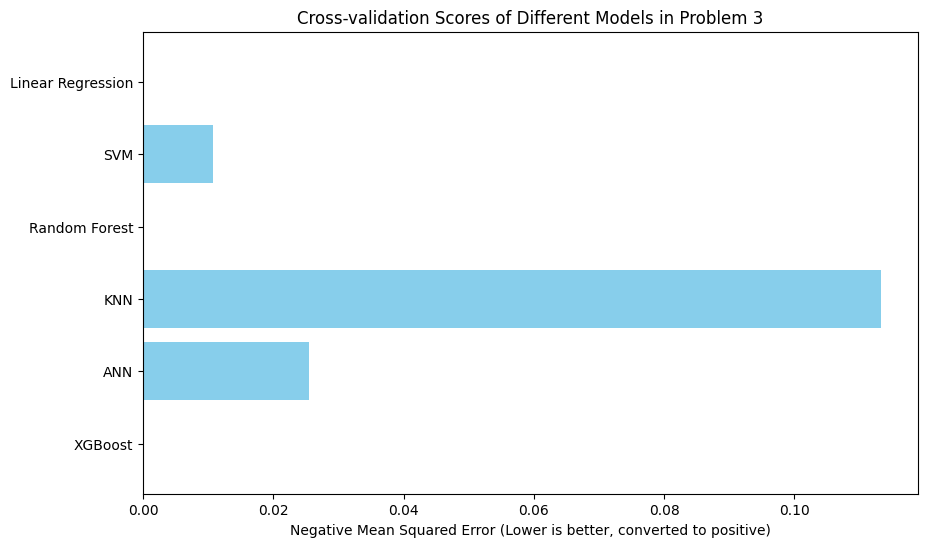

In [5]:
import matplotlib.pyplot as plt

# Data from the cross-validation results
models = ['Linear Regression', 'SVM', 'Random Forest', 'KNN', 'ANN', 'XGBoost']
#scores = [-0.095, -0.067, 0.0, -0.0457, -0.11156, -2.5123224111063827e-09]
#scores = [-7.4397826374978385e-09, -0.009191198986158142, 0, -0.07549295774647888,-0.023, -1.6095606377774851e-09]
scores = [-4.174679862854052e-09, -0.01079069838406831, 0,-0.11335211267605635,-0.025436013240115053,-1.931789759609757e-09  ]


# Convert negative scores to positive for illustrative purposes
positive_scores = [-score for score in scores]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, positive_scores, color='skyblue')
plt.xlabel('Negative Mean Squared Error (Lower is better, converted to positive)')
plt.title('Cross-validation Scores of Different Models in Problem 3')
plt.gca().invert_yaxis()  
plt.show()

In [41]:
import time
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# data = pd.read_csv('./train_data_problem1.csv', delimiter=',')
# data = pd.read_csv('./train_data_problem2.csv', delimiter=',')
# data = pd.read_csv('./train_data_problem3.csv', delimiter=',')

# Separate the features and the target variable
# X = data.drop('high_performance', axis=1)
# y = data['high_performance']

# X = data.drop('school_binary', axis=1)
# y = data['school_binary']

# X = data.drop('internet_binary', axis=1)
# y = data['internet_binary']



categorical_columns = X.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Initialize each model with chosen hyperparameters
# problem 1
# linear_model = Ridge(alpha=100) 
# svm_model = SVC(C=10, kernel='rbf')
# rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
# knn_model = KNeighborsClassifier(n_neighbors=10)
# ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
# xgb_model = XGBClassifier(learning_rate = 0.3, n_estimators=100, max_depth=3)

#problem 2
# linear_model = Ridge(alpha=0.01) 
# svm_model = SVC(C=100, kernel='rbf')
# rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
# xgb_model = XGBClassifier(learning_rate = 0.4, n_estimators=100, max_depth=3)

#problem 3
linear_model = Ridge(alpha=0.01) 
svm_model = SVC(C=100, kernel='rbf')
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
xgb_model = XGBClassifier(learning_rate = 0.4, n_estimators=100, max_depth=3)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)


# Train each model and measure performance and runtime
models = {
    'Linear Regression': linear_model,
    'SVM': svm_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
    'Artificial Neural Network': ann_model,
    'XGBoost': xgb_model
}

performance = {}
runtimes = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_encoded, y)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes[name] = runtime

    # Evaluate performance on training data
    y_pred = model.predict(X_encoded)
    mse = mean_squared_error(y, y_pred)
    neg_mse = -mse  # Negate mean squared error
    performance[name] = neg_mse

# Print performance and runtimes
for name, neg_mse in performance.items():
    runtime = runtimes[name]
    print(f"Training runtime for {name}: {runtime} seconds")
    print(f"Negative Mean Squared Error on training data for {name}: {neg_mse}")


Training runtime for Linear Regression: 0.009629964828491211 seconds
Negative Mean Squared Error on training data for Linear Regression: -1.890882884449764e-09
Training runtime for SVM: 0.00991511344909668 seconds
Negative Mean Squared Error on training data for SVM: -0.0
Training runtime for Random Forest: 0.015903949737548828 seconds
Negative Mean Squared Error on training data for Random Forest: -0.0
Training runtime for K-Nearest Neighbors: 0.00021600723266601562 seconds
Negative Mean Squared Error on training data for K-Nearest Neighbors: -0.10422535211267606
Training runtime for Artificial Neural Network: 0.10754680633544922 seconds
Negative Mean Squared Error on training data for Artificial Neural Network: -0.0
Training runtime for XGBoost: 0.05890464782714844 seconds
Negative Mean Squared Error on training data for XGBoost: -0.0


In [44]:
# validation
data = pd.read_csv('./train_data_problem3.csv', delimiter=',')

# Separate the features and the target variable
# X = data.drop('high_performance', axis=1)
# y = data['high_performance']

# X = data.drop('school_binary', axis=1)
# y = data['school_binary']

X = data.drop('internet_binary', axis=1)
y = data['internet_binary']



categorical_columns = X.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Initialize each model with chosen hyperparameters
linear_model = Ridge(alpha=100) 
svm_model = SVC(C=10, kernel='rbf')
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
knn_model = KNeighborsClassifier(n_neighbors=10)
ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
xgb_model = XGBClassifier(learning_rate = 0.3, n_estimators=100, max_depth=3)

# linear_model = Ridge(alpha=0.01) 
# svm_model = SVC(C=100, kernel='rbf')
# rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
# xgb_model = XGBClassifier(learning_rate = 0.4, n_estimators=100, max_depth=3)

# linear_model = Ridge(alpha=0.01) 
# svm_model = SVC(C=100, kernel='rbf')
# rf_model = RandomForestClassifier(n_estimators=10, max_depth=5)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# ann_model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01, activation='relu', solver='adam', max_iter=1000)
# xgb_model = XGBClassifier(learning_rate = 0.4, n_estimators=100, max_depth=3)


# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)


# Train each model and measure performance and runtime
models = {
    'Linear Regression': linear_model,
    'SVM': svm_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
    'Artificial Neural Network': ann_model,
    'XGBoost': xgb_model
}

performance = {}
runtimes = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_encoded, y)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes[name] = runtime

    # Evaluate performance on training data
    y_pred = model.predict(X_encoded)
    mse = mean_squared_error(y, y_pred)
    neg_mse = -mse  # Negate mean squared error
    performance[name] = neg_mse

# Print performance and runtimes
for name, neg_mse in performance.items():
    runtime = runtimes[name]
    print(f"Training runtime for {name}: {runtime} seconds")
    print(f"Negative Mean Squared Error on training data for {name}: {neg_mse}")
# Load the validation dataset
val_data = pd.read_csv('./val_data_problem3.csv', delimiter=',')

# Separate the features and the target variable
# X_val = val_data.drop('high_performance', axis=1)
# y_val = val_data['high_performance']
# X_val = val_data.drop('school_binary', axis=1)
# y_val = val_data['school_binary']
X_val = val_data.drop('internet_binary', axis=1)
y_val = val_data['internet_binary']

# Preprocess the validation data
X_val_encoded = preprocessor.transform(X_val)

# Evaluate performance and runtime for testing
test_performance = {}
test_runtimes = {}

for name, model in models.items():
    start_time = time.time()
    y_val_pred = model.predict(X_val_encoded)
    end_time = time.time()
    runtime = end_time - start_time
    test_runtimes[name] = runtime

    # Evaluate performance on validation data
    mse = mean_squared_error(y_val, y_val_pred)
    neg_mse = -mse  # Negate mean squared error
    test_performance[name] = neg_mse

# Print performance and runtimes for testing
for name, neg_mse in test_performance.items():
    runtime = test_runtimes[name]
    print(f"Testing runtime for {name}: {runtime} seconds")
    print(f"Negative Mean Squared Error on validation data for {name}: {neg_mse}")


Training runtime for Linear Regression: 0.006392955780029297 seconds
Negative Mean Squared Error on training data for Linear Regression: -0.033431785222249995
Training runtime for SVM: 0.006810665130615234 seconds
Negative Mean Squared Error on training data for SVM: -0.0
Training runtime for Random Forest: 0.008392095565795898 seconds
Negative Mean Squared Error on training data for Random Forest: -0.0
Training runtime for K-Nearest Neighbors: 0.000225067138671875 seconds
Negative Mean Squared Error on training data for K-Nearest Neighbors: -0.1352112676056338
Training runtime for Artificial Neural Network: 0.08391880989074707 seconds
Negative Mean Squared Error on training data for Artificial Neural Network: -0.0
Training runtime for XGBoost: 0.03932380676269531 seconds
Negative Mean Squared Error on training data for XGBoost: -0.0
Testing runtime for Linear Regression: 6.794929504394531e-05 seconds
Negative Mean Squared Error on validation data for Linear Regression: -0.058670631852